In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
articles = pd.read_excel("dataset.xlsx").set_index('article_id')

In [32]:
articles.head(3)

,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [33]:
#print(articles['prod_name'].unique())
print(articles['product_group_name'].unique())
print(articles['index_name'].unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body']
['Ladieswear' 'Lingeries/Tights' 'Baby Sizes 50-98' 'Menswear'
 'Ladies Accessories' 'Sport' 'Children Sizes 92-140' 'Divided'
 'Children Sizes 134-170']


In [34]:
prod_name_enc = LabelEncoder()
group_name_enc = LabelEncoder()
index_enc = LabelEncoder()

articles['prod_name'] = prod_name_enc.fit_transform(articles['prod_name'])
articles['product_group_name'] = group_name_enc.fit_transform(articles['product_group_name'])
articles['index_name'] = index_enc.fit_transform(articles['index_name'])

In [35]:
articles.head(3)

,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,108775,103,253,Vest top,3,1010016,Solid,9,Black,4,...,Jersey Basic,A,5,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775044,108775,103,253,Vest top,3,1010016,Solid,10,White,3,...,Jersey Basic,A,5,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775051,108775,104,253,Vest top,3,1010017,Stripe,11,Off White,1,...,Jersey Basic,A,5,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [36]:
dims = [
    'prod_name',
    'product_type_no',
    'product_group_name',
    'graphical_appearance_no',
    'colour_group_code',
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_name',
    'index_group_no',
    'section_no',
    'garment_group_no'
]

In [37]:
article_vectors = articles[dims].values
article_ids = articles.index.values
print(article_vectors.shape)
print(article_ids.shape)

(321, 12)
(321,)


In [38]:
article_data = {"id": article_ids, "vector": article_vectors}

In [40]:
class CosineSimilarityIndex():
    def __init__(self, article_vectors, labels):
        self.article_vectors = article_vectors.astype('float32')
        self.labels = labels
        
    def query(self, vector, k=5):
        similarities = cosine_similarity([vector], self.article_vectors).flatten()
        indices = similarities.argsort()[::-1][:k]
        return [self.labels[i] for i in indices]

In [41]:
index = CosineSimilarityIndex(article_data['vector'], article_data['id'])

In [42]:
index

In [43]:
similar_items_dict = {"item": [], "similar_items": []}
for x in range(len(article_data['vector'])):
    similar_items = index.query(article_data['vector'][x])
    similar_items_dict['item'].append(article_data['id'][x])
    similar_items_dict['similar_items'].append([item for item in similar_items if item != article_data['id'][x]])
similarities_df = pd.DataFrame(similar_items_dict)

In [44]:
similarities_df

,item,similar_items
0,108775015,"[108775044, 108775051, 202017055, 129085001]"
1,108775044,"[108775051, 108775015, 202017055, 129085026]"
2,108775051,"[108775044, 108775015, 202017055, 129085026]"
3,110065001,"[153115019, 110065002, 153115021, 110065011]"
4,110065002,"[153115021, 110065011, 153115020, 110065001]"
...,...,...
316,219075014,"[219075028, 219075021, 219075023, 219075017]"
317,219075017,"[219075023, 219075028, 219075014, 219075021]"
318,219075021,"[219075014, 219075028, 219075017, 219075023]"
319,219075023,"[219075017, 219075028, 219075014, 219075021]"


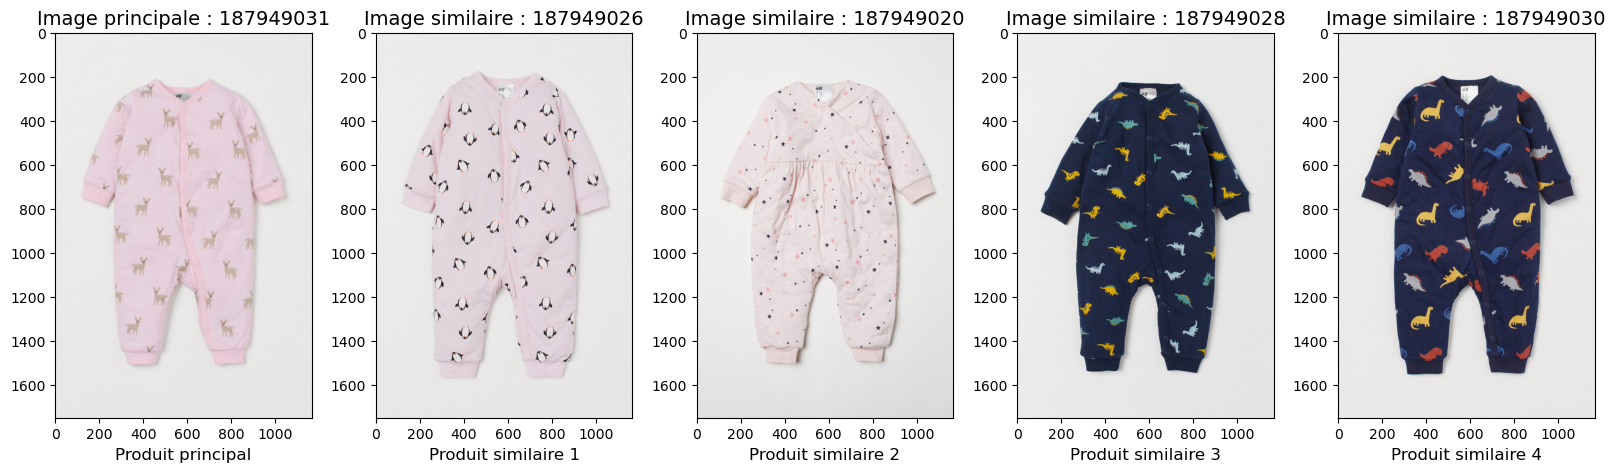

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 158

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

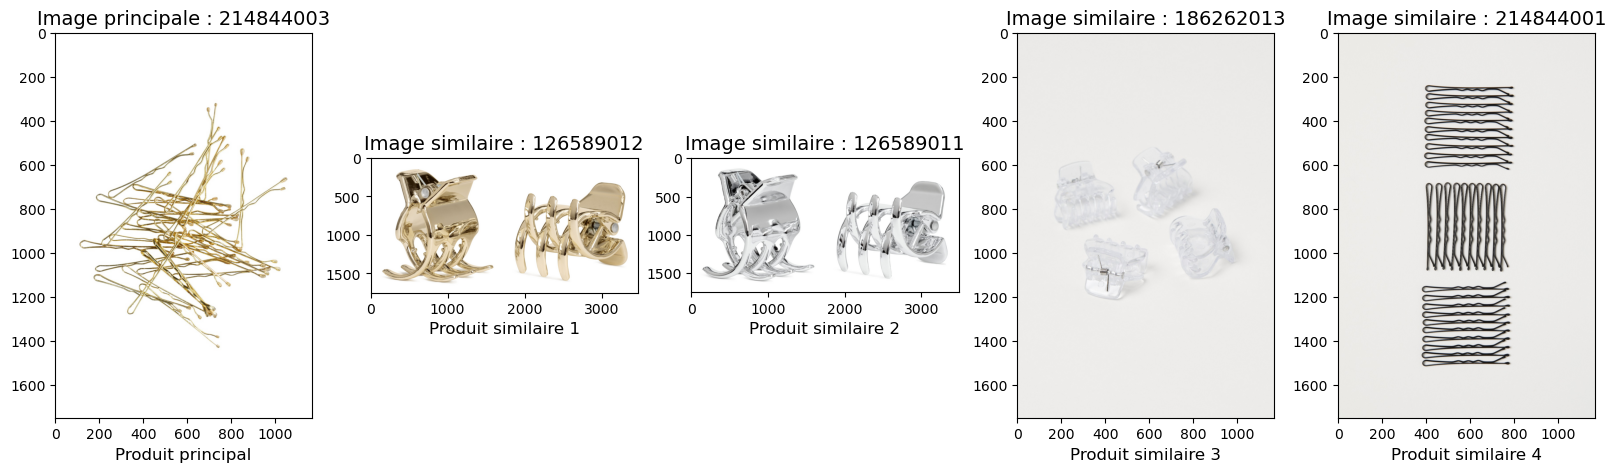

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 284

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

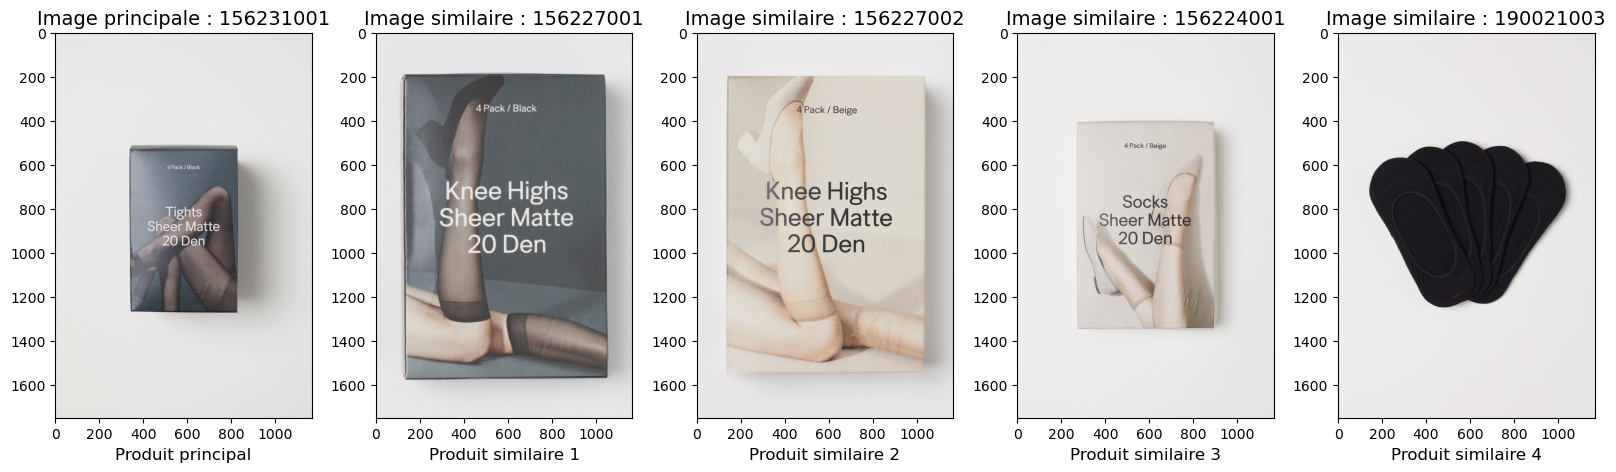

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 67

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

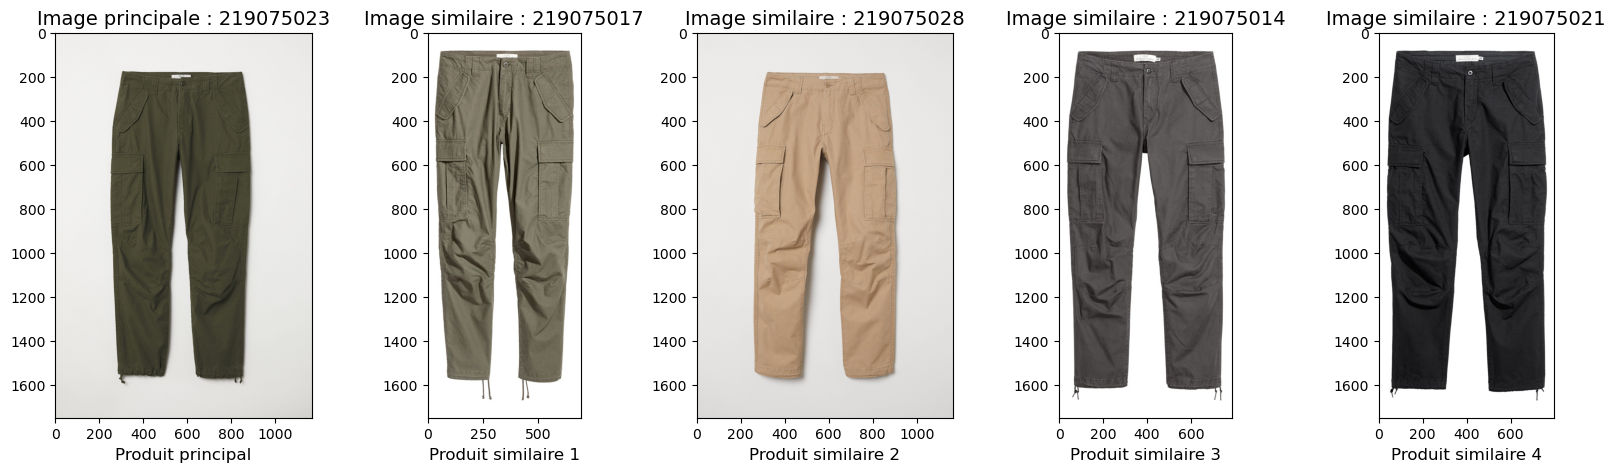

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 319

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()